<a href="https://colab.research.google.com/github/dasdasqs2/Machine-learning/blob/main/HW/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. 
- 8주차 강의노트에서 wine data를 다루는 예제가 있다. 강의에서 다룬 것처럼 7개의 ‘quality’를
3개의 quality로 재분류한다. 그리고 기존의 test data 정확도 (79.3%)보다 더 좋은 결과가 나오게
끔 신경망의 모델을 수정하거나 하이퍼파라미터(hyperparameter)를 바꾸는 코드를 작성하라.


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(42)

In [127]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [128]:
red['type'] = 0
white['type'] = 1
# mean의 의미-> red:white = 1:3

print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) #(red + white) dataframe
print(wine.describe()) #통계적 특징

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

In [129]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


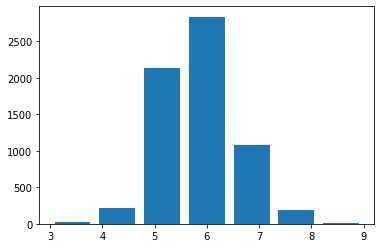

In [130]:
#imbalanced data
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [131]:
# 7 quality -> 3 quality
wine.loc[wine['quality'] <=5, 'new_quality'] = 0
wine.loc[wine['quality'] ==6, 'new_quality'] = 1
wine.loc[wine['quality'] >=7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [132]:
# data regularization & split test data
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [133]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=72, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=48, activation='relu'),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.5747 - accuracy: 0.7570 - val_loss: 0.4447 - val_accuracy: 0.8038
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7999 - val_loss: 0.4378 - val_accuracy: 0.8154
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7920 - val_loss: 0.4129 - val_accuracy: 0.8169
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8272 - val_loss: 0.4750 - val_accuracy: 0.8131
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8076 - val_loss: 0.4006 - val_accuracy: 0.8038
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8140 - val_loss: 0.4018 - val_accuracy: 0.8185
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8050 - val_loss: 0.4099 - val_accuracy: 0.8100
Epoch 

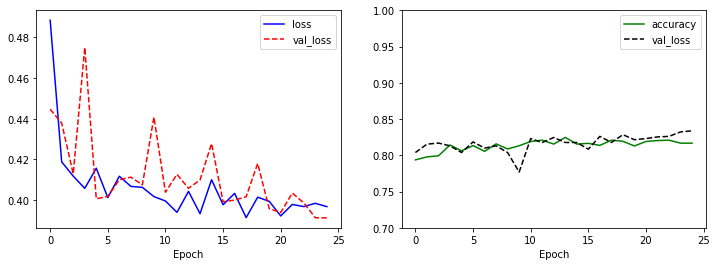

In [134]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [135]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8177


[0.39441782236099243, 0.8176922798156738]

# Q2. 8주차 강의노트에서 Fashion MNIST 데이터를 다루는 예제가 있다.
1. Fashion MNIST 데이터를 logistic regression 을 이용하여 학습한 뒤, test data를 적용하여
결과를 얻는다
2. Fashion MNIST 데이터를 수업 중 다룬 MLP로 학습한 뒤, test data를 적용하여 결과를 얻
는다
3. Fashion MNIST 데이터를 MLP로 학습하되, 위에서 학습한 결과보다 더 validation 결과를
얻을 수 있도록 모델을 바꾼 뒤, test data를 적용하여 결과를 얻는다
단, 위의 3문제에서 학습할 때, validation data 비율은 학습데이터의 25%로 둔다.

## 1. Logistic regression

In [136]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

dataset = datasets.load_digits()
x_data = dataset.data
y_data = dataset.target

In [137]:
print(x_data)
print(y_data) 

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [138]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_data, y_data, test_size=0.25)

In [139]:
tf.random.set_seed(42)
model1 = LogisticRegression(max_iter=100, tol=0.0001, penalty='l2', C=1.0)

model1.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
y_predict = model1.predict(test_X) 
score = metrics.accuracy_score(test_Y, y_predict)
print(score)

0.96


## 2. MLP

In [159]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_X0, train_Y0), (test_X0, test_Y0) = fashion_mnist.load_data()

print(len(train_X0), len(test_X0))

60000 10000


In [173]:
train_X = train_X0 / 255.0
test_X = test_X0 / 255.0

In [174]:
from keras.utils import to_categorical

train_Y = to_categorical(train_Y0, 10)
test_Y = to_categorical(test_Y0, 10)

In [175]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

In [176]:
tf.random.set_seed(42)
history = model2.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 2ms/step - loss: 0.6608 - accuracy: 0.7713 - val_loss: 0.5108 - val_accuracy: 0.8123
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3989 - accuracy: 0.8585 - val_loss: 0.3777 - val_accuracy: 0.8655
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8719 - val_loss: 0.3749 - val_accuracy: 0.8683
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3289 - accuracy: 0.8805 - val_loss: 0.3443 - val_accuracy: 0.8742
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2989 - accuracy: 0.8898 - val_loss: 0.3301 - val_accuracy: 0.8833
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.8951 - val_loss: 0.3527 - val_accuracy: 0.8774
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2754 - accuracy: 0.8978 - val_loss: 0.3249 - val_accuracy:

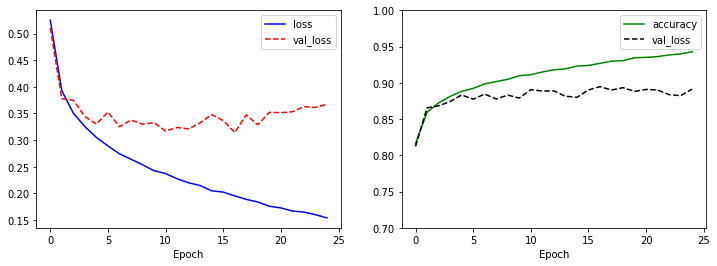

In [177]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [178]:
model2.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8845


[0.40815603733062744, 0.8845000267028809]

## 3. best_MLP

In [179]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [180]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X0, train_Y0), (test_X0, test_Y0) = fashion_mnist.load_data()

# Reshape
train_X = train_X0.reshape(60000,28,28,1)
test_X = test_X0.reshape(10000,28,28,1)

In [181]:
train_X = train_X0 / 255.0
test_X = test_X0 / 255.0

In [182]:
from keras.utils import to_categorical

train_Y = to_categorical(train_Y0, 10)
test_Y = to_categorical(test_Y0, 10)

In [183]:
model3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(256, activation='tanh', kernel_initializer = 'he_normal' ,input_shape=(28*28,)),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128, activation='tanh',kernel_initializer = 'he_normal'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(100, activation='tanh',kernel_initializer = 'he_normal'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10, activation='sigmoid',kernel_initializer = 'he_normal')
      ])

optim = keras.optimizers.SGD(lr=0.01, momentum=0.975, decay=2e-06, nesterov=True)
model3.compile(optimizer=optim,loss='categorical_crossentropy', metrics=['accuracy'])

In [187]:
tf.random.set_seed(42)
history = model3.fit(train_X, train_Y, epochs=100, batch_size=32,  validation_split=0.25)

Epoch 1/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6795 - accuracy: 0.7806 - val_loss: 0.5315 - val_accuracy: 0.8281
Epoch 2/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6791 - accuracy: 0.7802 - val_loss: 0.5436 - val_accuracy: 0.8239
Epoch 3/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6800 - accuracy: 0.7797 - val_loss: 0.5074 - val_accuracy: 0.8309
Epoch 4/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6674 - accuracy: 0.7849 - val_loss: 0.5146 - val_accuracy: 0.8326
Epoch 5/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6686 - accuracy: 0.7844 - val_loss: 0.5226 - val_accuracy: 0.8301
Epoch 6/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6605 - accuracy: 0.7869 - val_loss: 0.5200 - val_accuracy: 0.8358
Epoch 7/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6513 - accuracy: 0.7906 - val_loss: 0.5048 - val_ac

KeyboardInterrupt: ignored

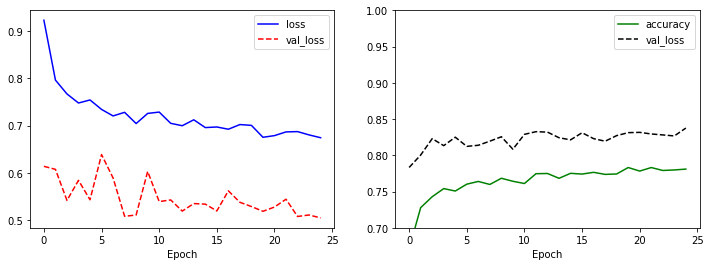

In [185]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [186]:
model3.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.8300


[0.5326970815658569, 0.8299999833106995]